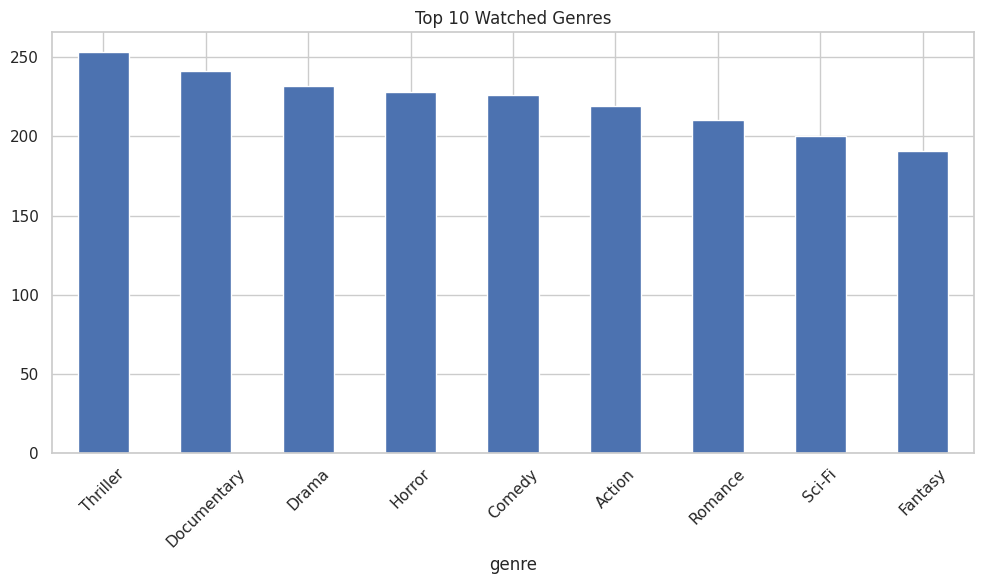

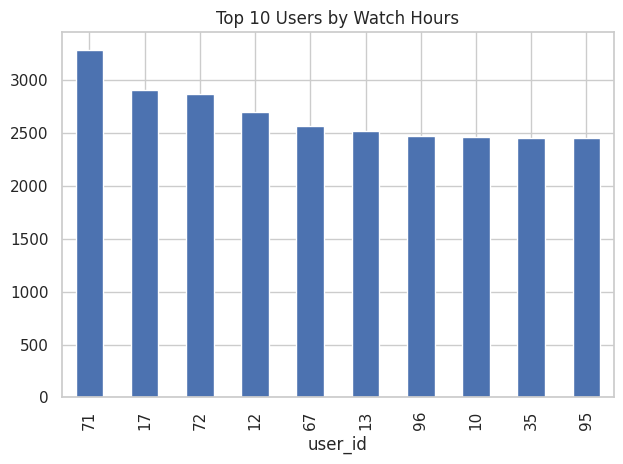

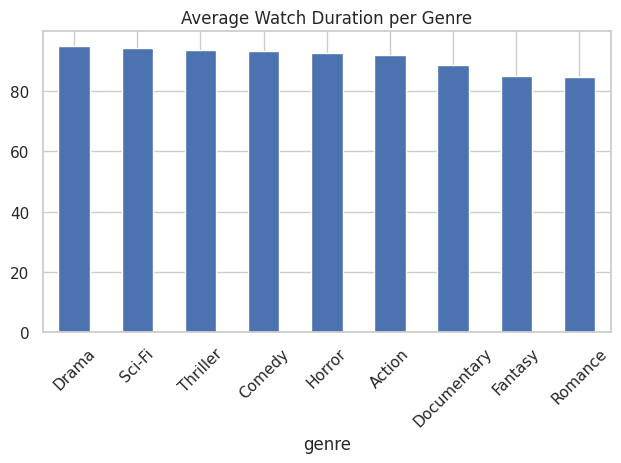

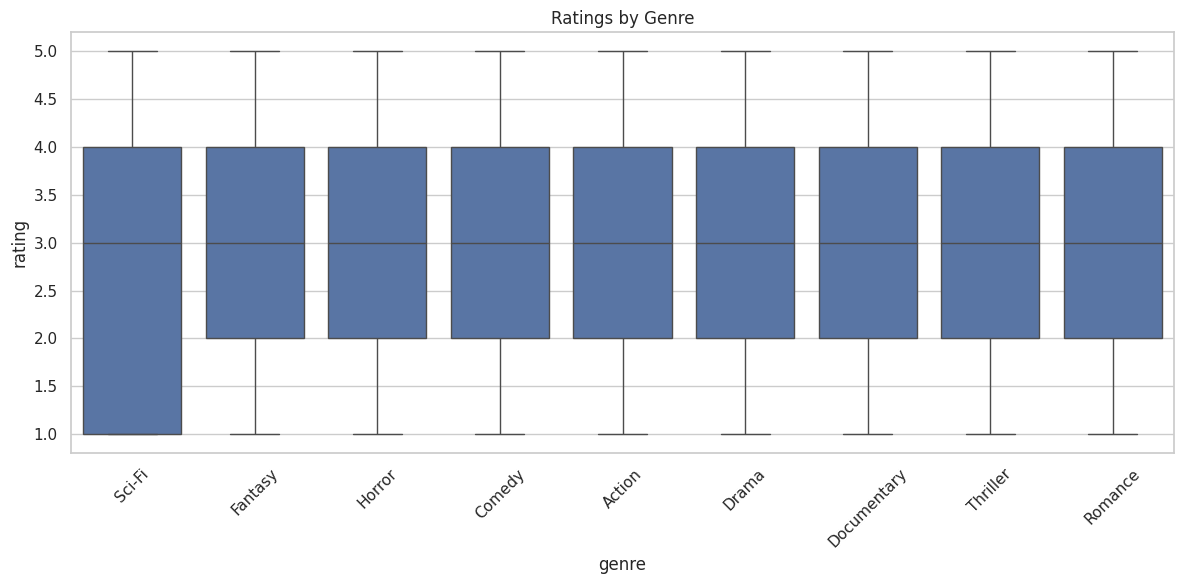

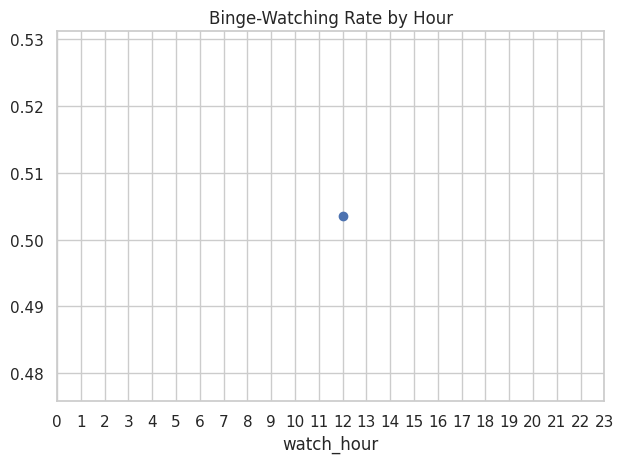

In [1]:
# EDA for Netflix User Behavior
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Upload file manually in the left pane before running this
df = pd.read_csv("netflix_user_data.csv")

# Preprocessing
df['watch_date'] = pd.to_datetime(df['watch_date'])
df['watch_day'] = df['watch_date'].dt.day_name()
df['watch_hour'] = df['watch_date'].dt.hour
df['month'] = df['watch_date'].dt.month_name()
df['is_binge'] = df['watch_duration'] >= 90

# Plot style
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Top Genres
df['genre'].value_counts().head(10).plot(kind='bar', title='Top 10 Watched Genres')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top Users by Watch Hours
df.groupby('user_id')['watch_duration'].sum().sort_values(ascending=False).head(10).plot(kind='bar', title='Top 10 Users by Watch Hours')
plt.tight_layout()
plt.show()

# Average Duration per Genre
df.groupby('genre')['watch_duration'].mean().sort_values(ascending=False).plot(kind='bar', title='Average Watch Duration per Genre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Ratings vs Genre
plt.figure(figsize=(12, 6))
sns.boxplot(x='genre', y='rating', data=df)
plt.xticks(rotation=45)
plt.title('Ratings by Genre')
plt.tight_layout()
plt.show()

# Binge Behavior by Hour
df.groupby('watch_hour')['is_binge'].mean().plot(marker='o', title='Binge-Watching Rate by Hour')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()


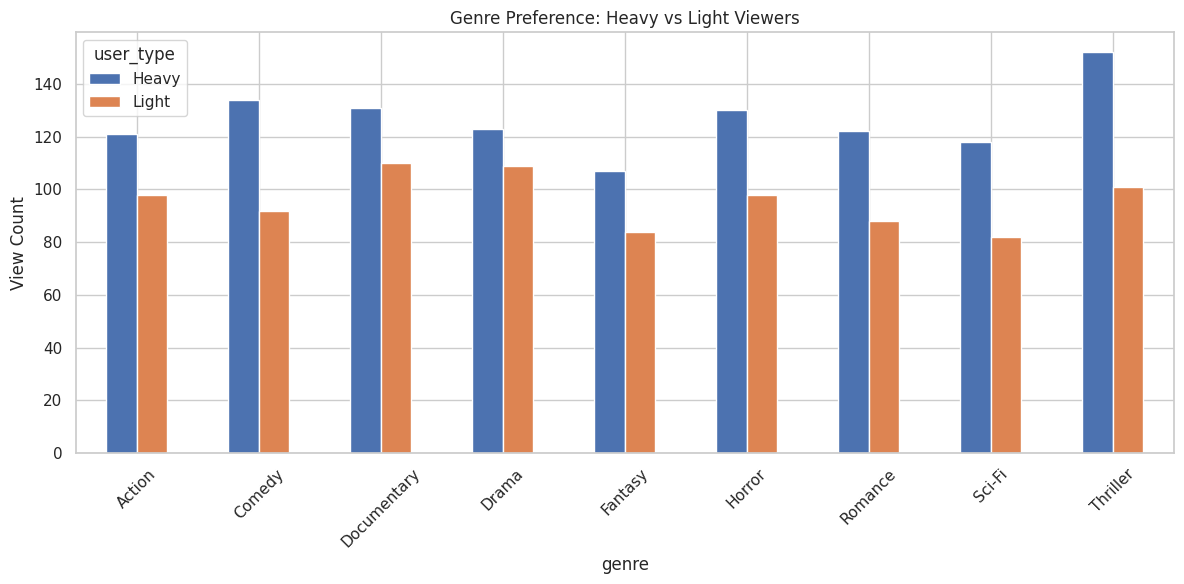

In [2]:
# Total watch time per user
user_watch_time = df.groupby('user_id')['watch_duration'].sum()

# Define user types
df['user_type'] = df['user_id'].apply(lambda x: 'Heavy' if user_watch_time[x] >= user_watch_time.median() else 'Light')

# Genre preferences
genre_by_user_type = df.groupby(['user_type', 'genre']).size().unstack().fillna(0)

# Plot
genre_by_user_type.T.plot(kind='bar', figsize=(12, 6), title="Genre Preference: Heavy vs Light Viewers")
plt.xticks(rotation=45)
plt.ylabel("View Count")
plt.tight_layout()
plt.show()


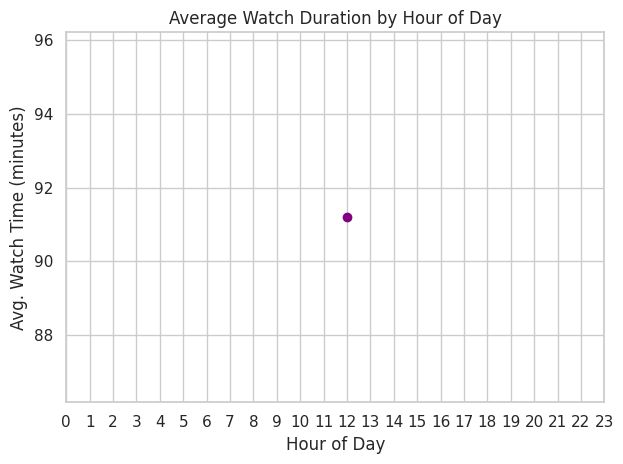

In [3]:
# Plot user behavior over 24 hours
hourly_watch = df.groupby('watch_hour')['watch_duration'].mean()

hourly_watch.plot(kind='line', marker='o', title='Average Watch Duration by Hour of Day', color='purple')
plt.xlabel("Hour of Day")
plt.ylabel("Avg. Watch Time (minutes)")
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()


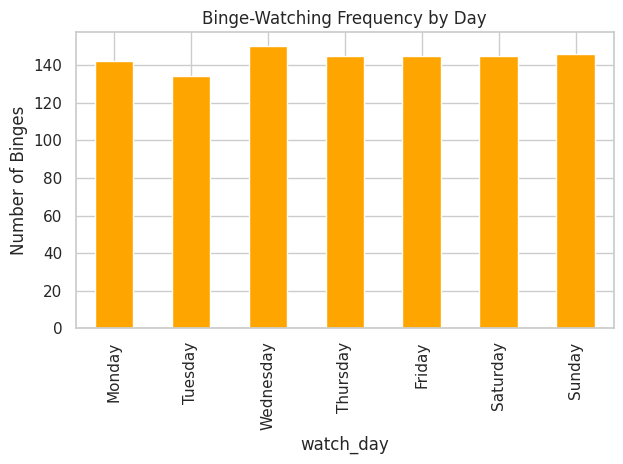

In [4]:
binge_day = df[df['is_binge'] == True]['watch_day'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

binge_day.plot(kind='bar', color='orange', title='Binge-Watching Frequency by Day')
plt.ylabel("Number of Binges")
plt.tight_layout()
plt.show()


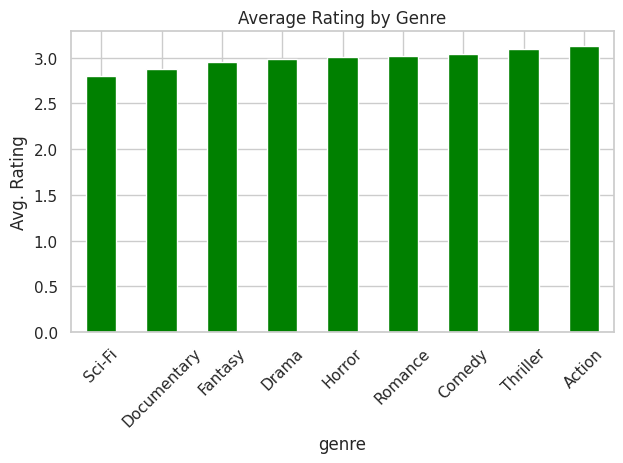

In [5]:
avg_rating_by_genre = df.groupby('genre')['rating'].mean().sort_values()

avg_rating_by_genre.plot(kind='bar', color='green', title='Average Rating by Genre')
plt.ylabel("Avg. Rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Load data
df = pd.read_csv("netflix_user_data.csv")
df['watch_date'] = pd.to_datetime(df['watch_date'])
df['watch_hour'] = df['watch_date'].dt.hour
df['watch_day'] = df['watch_date'].dt.day_name()
df['is_binge'] = df['watch_duration'] >= 90

# User type
watch_time = df.groupby('user_id')['watch_duration'].sum()
df['user_type'] = df['user_id'].apply(lambda x: 'Heavy' if watch_time[x] >= watch_time.median() else 'Light')

# Features and target
features = df[['genre', 'watch_hour', 'rating', 'user_type']]
target = df['is_binge'].astype(int)

# Preprocessing: One-hot encode categorical features
categorical_features = ['genre', 'user_type']
numeric_features = ['watch_hour', 'rating']

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(), categorical_features)
], remainder='passthrough')

# Model pipeline
model = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train model
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

print("📊 Classification Report:")
print(classification_report(y_test, y_pred))
print("🧩 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



📊 Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.49      0.50       188
           1       0.56      0.58      0.57       212

    accuracy                           0.54       400
   macro avg       0.54      0.54      0.54       400
weighted avg       0.54      0.54      0.54       400

🧩 Confusion Matrix:
[[ 93  95]
 [ 90 122]]
